In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from pandas import Series
from sklearn.cluster import KMeans

In [10]:
df = pd.read_csv("Customers.csv")

In [11]:
df.head(10)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
5,6,Female,22,58000,76,Artist,0,2
6,7,Female,35,31000,6,Healthcare,1,3
7,8,Female,23,84000,94,Healthcare,1,3
8,9,Male,64,97000,3,Engineer,0,3
9,10,Female,30,98000,72,Artist,1,4


In [12]:
df.rename(columns = {'Annual Income ($)' : 'Annual Income'}, inplace = True)
df.rename(columns = {'Spending Score (1-100)' : 'Spending Score'}, inplace = True)

In [13]:
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score,Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [14]:
df.describe()

,CustomerID,Age,Annual Income,Spending Score,Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [15]:
df.shape

(2000, 8)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerID       2000 non-null   int64 
 1   Gender           2000 non-null   object
 2   Age              2000 non-null   int64 
 3   Annual Income    2000 non-null   int64 
 4   Spending Score   2000 non-null   int64 
 5   Profession       1965 non-null   object
 6   Work Experience  2000 non-null   int64 
 7   Family Size      2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [17]:
df.dtypes

CustomerID          int64
Gender             object
Age                 int64
Annual Income       int64
Spending Score      int64
Profession         object
Work Experience     int64
Family Size         int64
dtype: object

In [18]:
df.isnull().sum()

CustomerID          0
Gender              0
Age                 0
Annual Income       0
Spending Score      0
Profession         35
Work Experience     0
Family Size         0
dtype: int64

In [19]:
df["Profession"].head(10)

0       Healthcare
1         Engineer
2         Engineer
3           Lawyer
4    Entertainment
5           Artist
6       Healthcare
7       Healthcare
8         Engineer
9           Artist
Name: Profession, dtype: object

In [20]:
mode_profession = df['Profession'].mode()[0]

In [21]:
df["Profession"].fillna(mode_profession, inplace=True)

In [22]:
df.isnull().sum()

CustomerID         0
Gender             0
Age                0
Annual Income      0
Spending Score     0
Profession         0
Work Experience    0
Family Size        0
dtype: int64

In [23]:
X = df.iloc[:,[3,4]].values

In [24]:
print(X)

[[ 15000     39]
 [ 35000     81]
 [ 86000      6]
 ...
 [ 90961     14]
 [182109      4]
 [110610     52]]


In [25]:
df.drop(["CustomerID"], axis = 1, inplace = True)
df.drop(["Work Experience"], axis = 1, inplace = True)
df.drop(["Family Size"], axis = 1, inplace = True)

In [26]:
df.head(10)

,Gender,Age,Annual Income,Spending Score,Profession
0,Male,19,15000,39,Healthcare
1,Male,21,35000,81,Engineer
2,Female,20,86000,6,Engineer
3,Female,23,59000,77,Lawyer
4,Female,31,38000,40,Entertainment
5,Female,22,58000,76,Artist
6,Female,35,31000,6,Healthcare
7,Female,23,84000,94,Healthcare
8,Male,64,97000,3,Engineer
9,Female,30,98000,72,Artist


C:\Users\Gargi\AppData\Local\Temp\ipykernel_4900\3273305419.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], bins = 20)
C:\Users\Gargi\AppData\Local\Temp\ipykernel_4900\3273305419.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], bins = 20)
C:\Users\Gargi\AppData\Local\Temp\ip

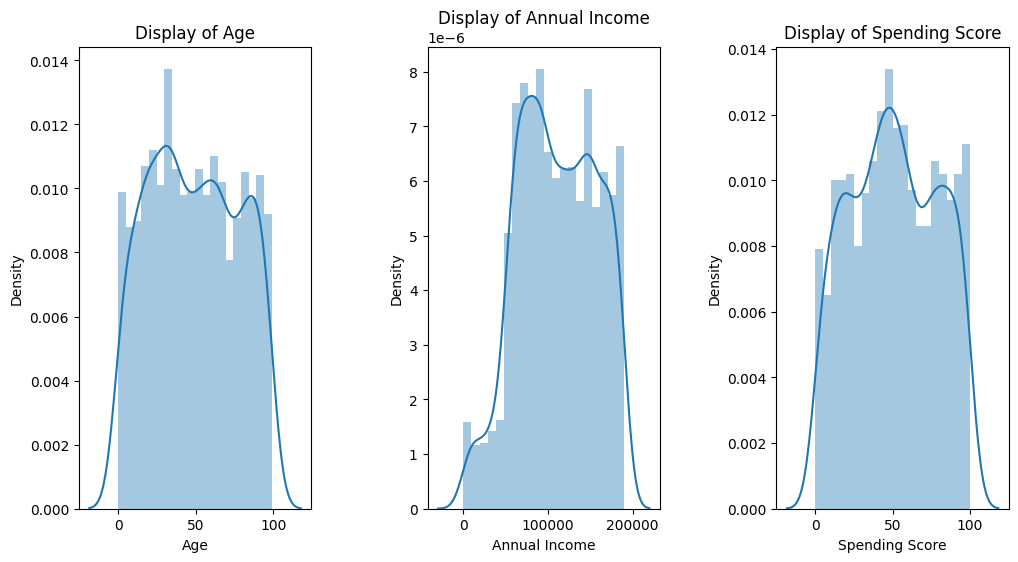

In [27]:
plt.figure(1, figsize = (12, 6))
n = 0
for x in ['Age', 'Annual Income', 'Spending Score']:
    n +=1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(df[x], bins = 20)
    plt.title('Display of {}'.format(x))

plt.show()

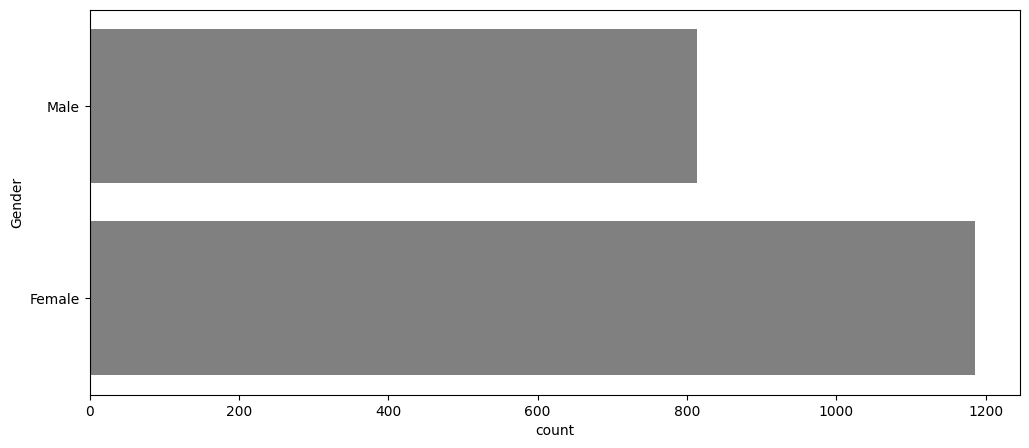

In [28]:
plt.figure(figsize = (12, 5))
sns.countplot(y = 'Gender', data = df, color = 'grey')
plt.show()

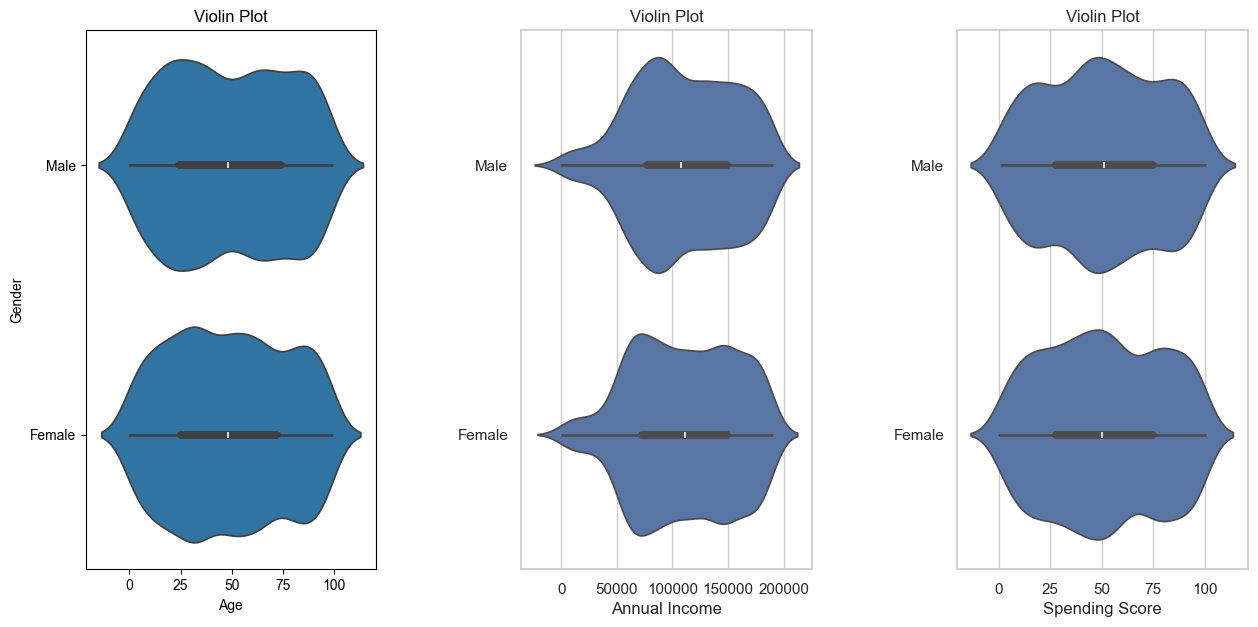

In [29]:
plt.figure(1, figsize = (15, 7))
n = 0
for cols in ['Age', 'Annual Income', 'Spending Score']:
    n += 1
    plt.subplot(1, 3, n)
    sns.set(style = "whitegrid")
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.violinplot(x = cols, y = 'Gender', data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Violin Plot')

plt.show()

<Figure size 1200x500 with 0 Axes>

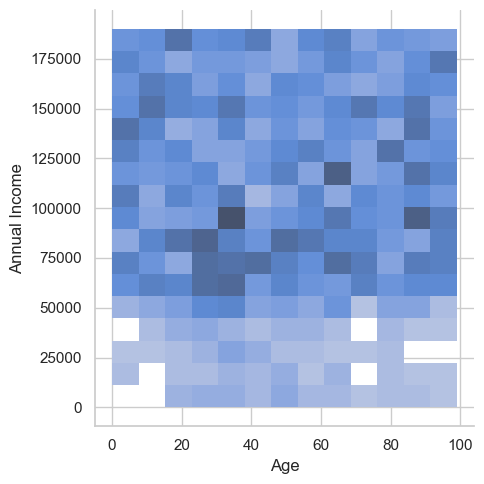

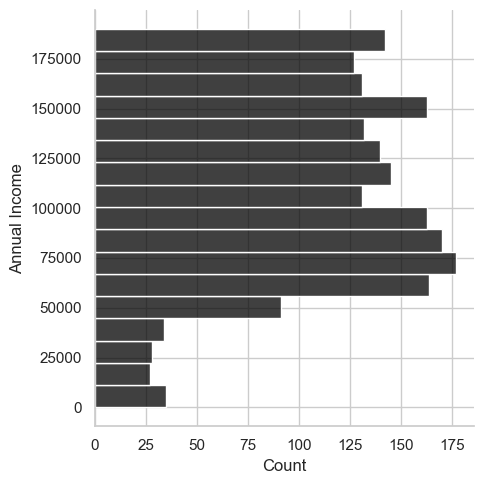

In [75]:
plt.figure(figsize = (12, 5))
sns.displot(x = 'Age', y = 'Annual Income', data = df)
sns.displot(y = 'Annual Income', data = df, color = 'black')
plt.show()

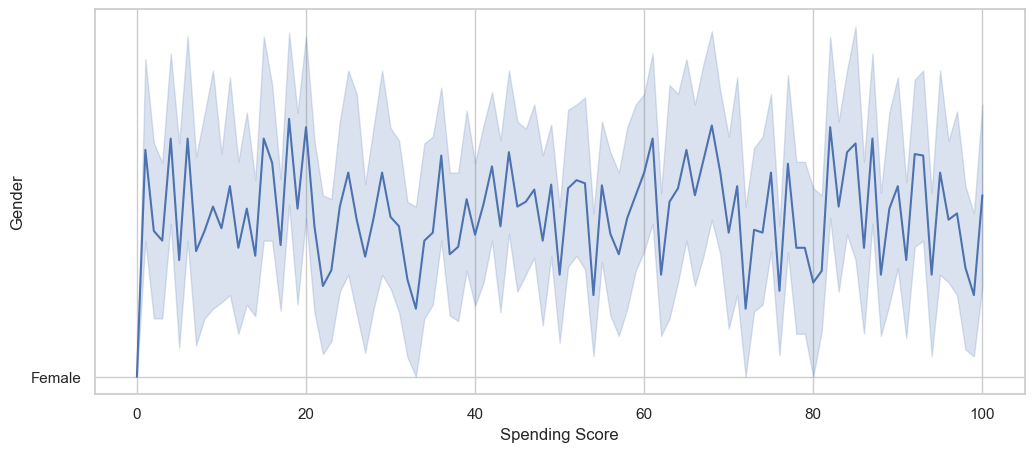

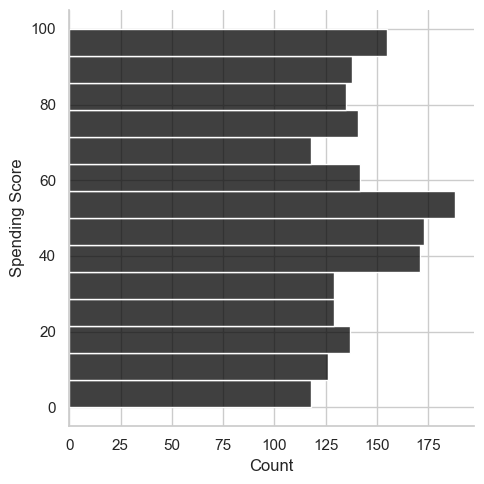

In [81]:
plt.figure(figsize = (12, 5))
sns.lineplot(x = 'Spending Score', y = 'Gender', data = df)
sns.displot(y = 'Spending Score', data = df, color = 'black')
plt.show()

C:\Users\Gargi\AppData\Local\Temp\ipykernel_4900\4247183504.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = age_x, y = age_y, palette = "mako")


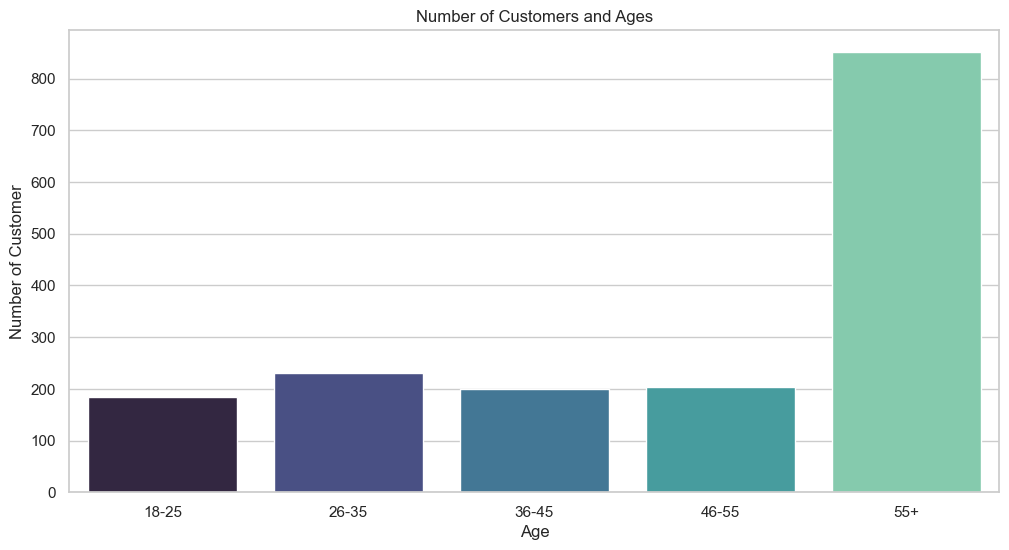

In [84]:
age_18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age_55above = df.Age[(df.Age >= 56)]

age_x = ["18-25", "26-35", "36-45", "46-55", "55+"]
age_y = [len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_46_55.values), len(age_55above.values)]

plt.figure(figsize = (12, 6))
sns.barplot(x = age_x, y = age_y, palette = "mako")
plt.title("Number of Customers and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

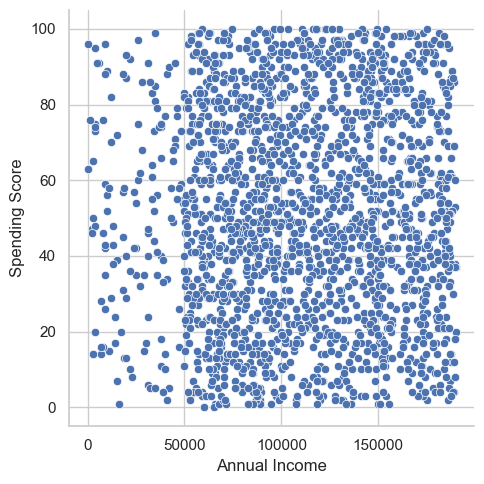

In [87]:
sns.relplot(x = 'Annual Income', y = 'Spending Score', data = df)

C:\Users\Gargi\AppData\Local\Temp\ipykernel_4900\1025181125.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = ss_x, y = ss_y, palette = "rocket")


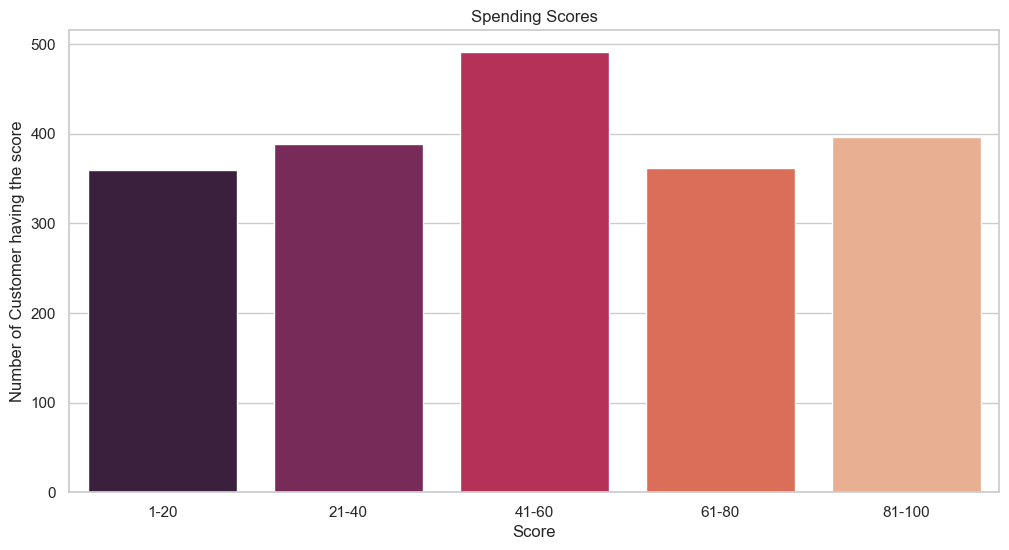

In [90]:
ss_1_20 = df["Spending Score"][(df["Spending Score"] >= 1) & (df["Spending Score"] <= 20)]
ss_21_40 = df["Spending Score"][(df["Spending Score"] >= 21) & (df["Spending Score"] <= 40)]
ss_41_60 = df["Spending Score"][(df["Spending Score"] >= 41) & (df["Spending Score"] <= 60)]
ss_61_80 = df["Spending Score"][(df["Spending Score"] >= 61) & (df["Spending Score"] <= 80)]
ss_81_100 = df["Spending Score"][(df["Spending Score"] >= 81) & (df["Spending Score"] <= 100)]

ss_x = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ss_y = [len(ss_1_20.values), len(ss_21_40.values), len(ss_41_60.values), len(ss_61_80.values), len(ss_81_100.values)]

plt.figure(figsize = (12, 6))
sns.barplot(x = ss_x, y = ss_y, palette = "rocket")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer having the score")
plt.show()

C:\Users\Gargi\AppData\Local\Temp\ipykernel_4900\1082833238.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = ai_x, y = ai_y, palette = "Spectral")


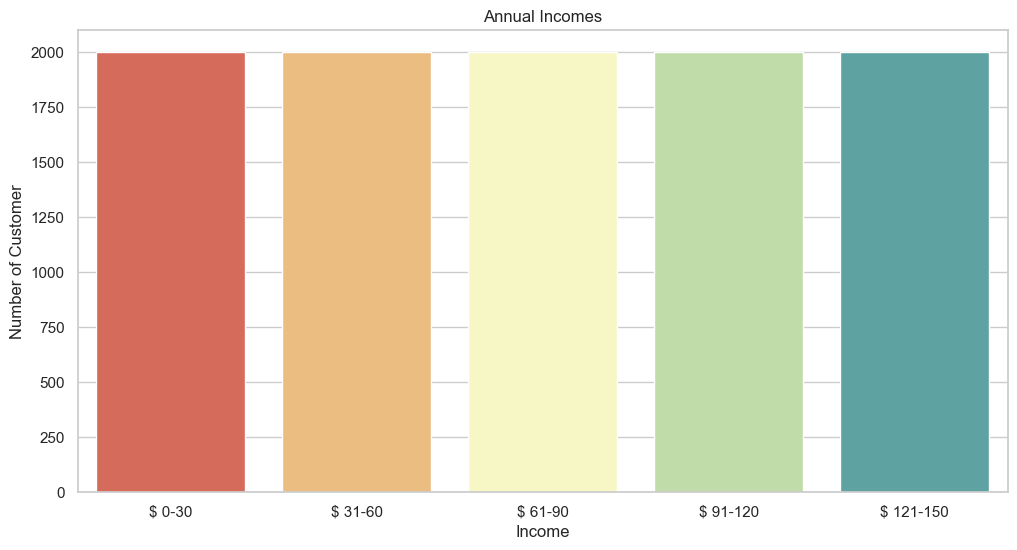

In [94]:
ai_0_30 = df["Annual Income"][(df["Annual Income"] >= 0) & (df["Annual Income"]) <= 30]
ai_31_60 = df["Annual Income"][(df["Annual Income"] >= 31) & (df["Annual Income"]) <= 60]
ai_61_90 = df["Annual Income"][(df["Annual Income"] >= 61) & (df["Annual Income"]) <= 90]
ai_91_120 = df["Annual Income"][(df["Annual Income"] >= 91) & (df["Annual Income"]) <= 120]
ai_121_150 = df["Annual Income"][(df["Annual Income"] >= 121) & (df["Annual Income"]) <= 150]

ai_x = ["$ 0-30", "$ 31-60", "$ 61-90", "$ 91-120", "$ 121-150"]
ai_y = [len(ai_0_30.values), len(ai_31_60.values), len(ai_61_90.values), len(ai_91_120.values), len(ai_121_150.values)]

plt.figure(figsize = (12, 6))
sns.barplot(x = ai_x, y = ai_y, palette = "Spectral")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

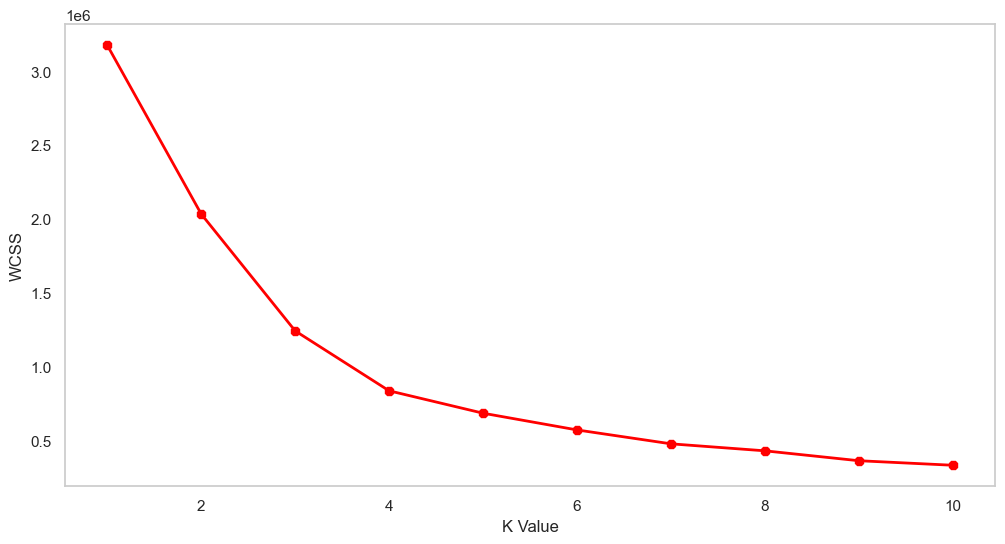

In [97]:
x1 = df.loc[:, ["Age", "Spending Score"]].values

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = "k-means++")
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth = 2, color = 'red', marker = "8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [116]:
kmeans = KMeans(n_clusters = 4)

label = kmeans.fit_predict(x1)

print (label)

[0 3 0 ... 1 1 2]


In [117]:
print(kmeans.cluster_centers_)

[[26.42565056 28.24907063]
 [74.80122951 27.41393443]
 [72.96184739 73.28915663]
 [22.82563025 77.41806723]]


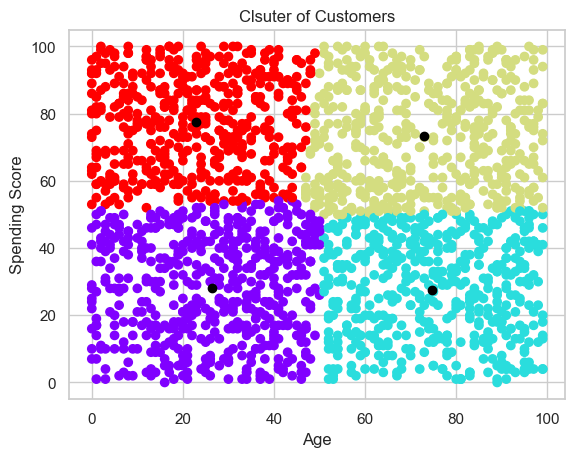

In [118]:
plt.scatter(x1[:, 0], x1[:, 1], c = kmeans.labels_, cmap = 'rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'black')
plt.title('Clsuter of Customers')
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.show()

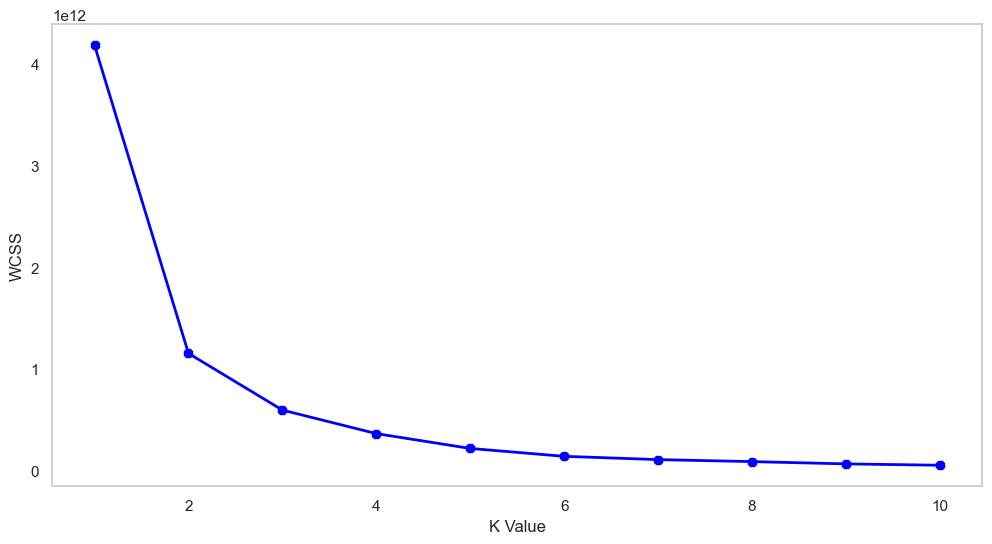

In [119]:
x2 = df.loc[:, ["Annual Income", "Spending Score"]].values

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = "k-means++")
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth = 2, color = 'blue', marker = "8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [120]:
kmeans = KMeans(n_clusters = 5)

label = kmeans.fit_predict(x2)

print(label)

[4 4 0 ... 0 1 0]


In [121]:
print(kmeans.cluster_centers_)

[[9.81495294e+04 5.12819473e+01]
 [1.72678750e+05 5.10000000e+01]
 [6.52160084e+04 4.95849057e+01]
 [1.36284740e+05 5.23443299e+01]
 [2.19338843e+04 4.94214876e+01]]


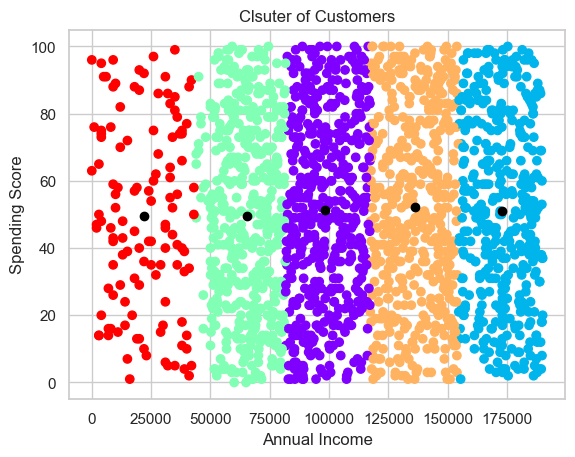

In [123]:
plt.scatter(x2[:, 0], x1[:, 1], c = kmeans.labels_, cmap = 'rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'black')
plt.title('Clsuter of Customers')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

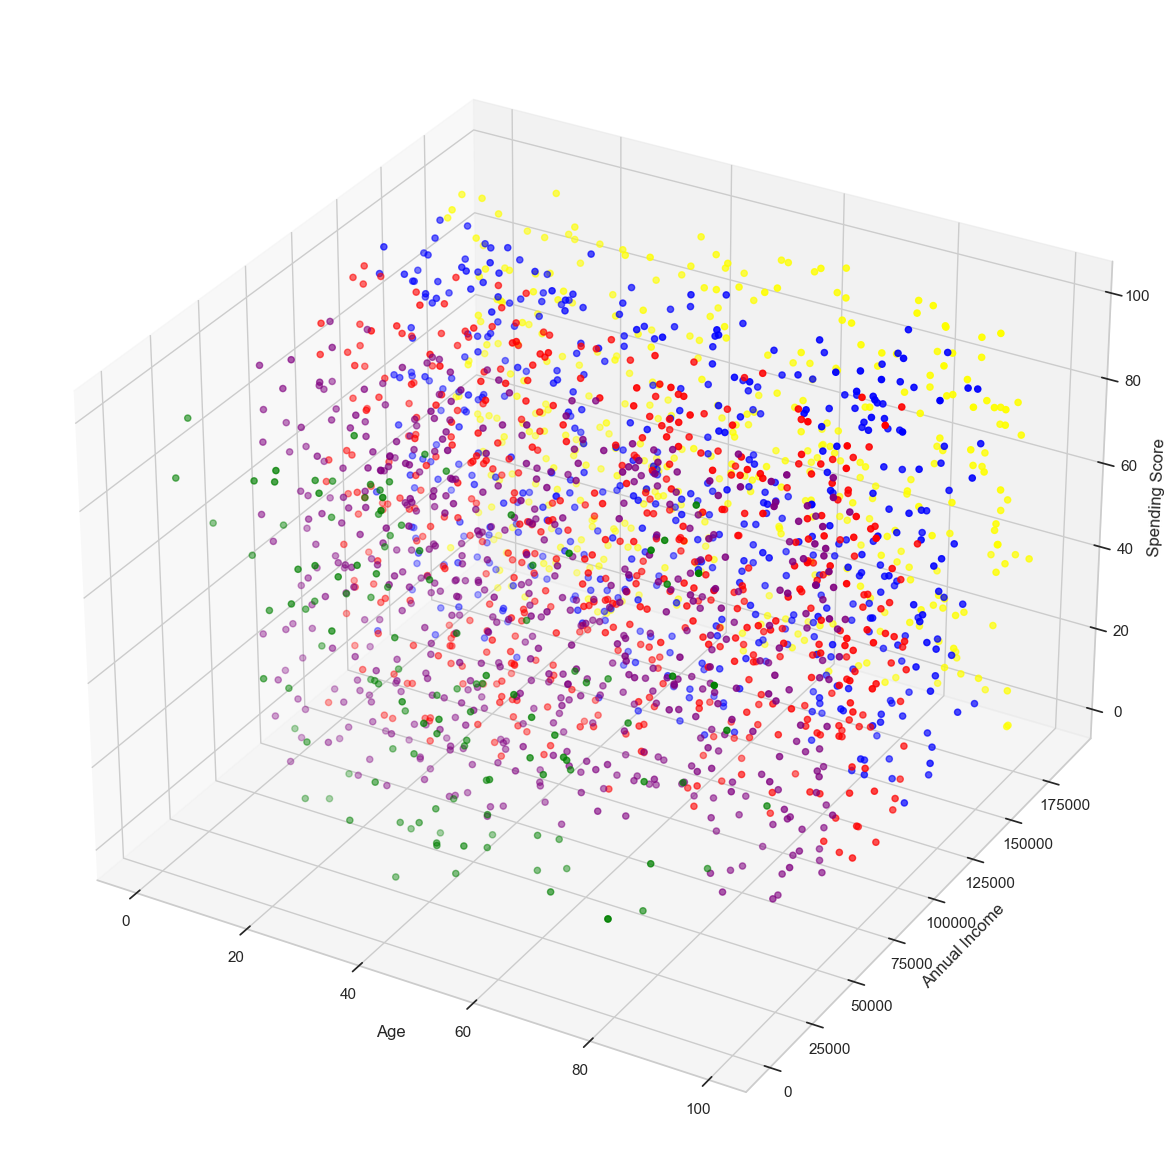

In [141]:
clusters = kmeans.fit_predict(x2)
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (30, 15))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income"][df.label == 0], df["Spending Score"][df.label == 0], c = 'blue')
ax.scatter(df.Age[df.label == 1], df["Annual Income"][df.label == 1], df["Spending Score"][df.label == 1], c = 'purple')
ax.scatter(df.Age[df.label == 2], df["Annual Income"][df.label == 2], df["Spending Score"][df.label == 2], c = 'red')
ax.scatter(df.Age[df.label == 3], df["Annual Income"][df.label == 3], df["Spending Score"][df.label == 3], c = 'yellow')
ax.scatter(df.Age[df.label == 4], df["Annual Income"][df.label == 4], df["Spending Score"][df.label == 4], c = 'green')

plt.xlabel("Age")
plt.ylabel("Annual Income")
ax.set_zlabel("Spending Score")

plt.show()